# Relative Strength Index Strategy Evaluation

The Relative Strength Index (RSI) is a technical momentum indicator which is used to evaluate if the stock is overbought or oversold. Traditional interpretation and usage of the RSI are that values of 70 or above indicate the stock is becoming overbought while values of 30 or below indicate oversold conditions. For this evaluation, we chose 60 and 40 as our thresholds to identify a higher quantity of trade signals.

When we refer to the RSI strategy, it is a three layered composite strategy as illustrated by the table below. By applying all filters jointly, we obtain filtered trade signals.

|RSI strategy|
|-------|
|Filter 1 (Trades with correct oscillator polarity)|
|Filter 2 (Trades with oscillator value between -7 to 7)|
|RSI|

For the RSI filter, it obtains trade signals that are aligned with the market trend:

- For Buy actions, the market shows bearish price momentum, as represented by RSI value equal to or below 40.

- For Sell actions, the market shows bullish price momentum, as represented by RSI value equal to or above 60.

There are custom functions located in a separate python script `rsi_calculation.py` that calculate the annualised return metric:
- **filtered_signals_rsi**: For a given strategy, it generates the filtered signals across 21 years for 1 stock.
- **portfolio_eval_rsi**: For a given strategy, it compiles all filtered signals for all stocks to calculate the yearly breakdown of the annualised return metric.
- **strategy_eval_rsi**: It compiles a yearly breakdown of the annualised return metric for all strategy combinations that are explored.
- **get_stats_rsi**: Given the data for yearly average annualised returns for multiple strategies, it returns the best strategy combination based on the average annualised returns and calculates the relevant statistics.

In [10]:
from rsi_calculation import filtered_signals_rsi, portfolio_eval_rsi, strategy_eval_rsi, get_stats_rsi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import talib as ta
from os import listdir
from os.path import isfile, join

from tqdm import tqdm
# Remove settingwithcopy warning
pd.options.mode.chained_assignment = None

In [2]:
# directory paths
data_directory_path = "../../data/2020/"

# Preliminary exploration

Prior to the creation of this notebook, we explored 100 intraday intervals for the RSI window parameter. We set the search range to (2,100) since after 100, the filtered signals would be less than 1% of the total signals. Additionally, a longer time window resulted in fewer filtered signals and is not consistent with Seahorse's trading time-horizon. Thus, we set our preliminary search range to (2,100).

Based on the previous work, we would first visualise these 100 results and replicate the strategy evaluation search over a reduced parameter space where the highest annualised return metric is observed.

In [13]:
large_buy_df = pd.read_csv("full_optimisation_file/buy_df.csv", index_col=0)
large_sell_df = pd.read_csv("full_optimisation_file/sell_df.csv", index_col=0)

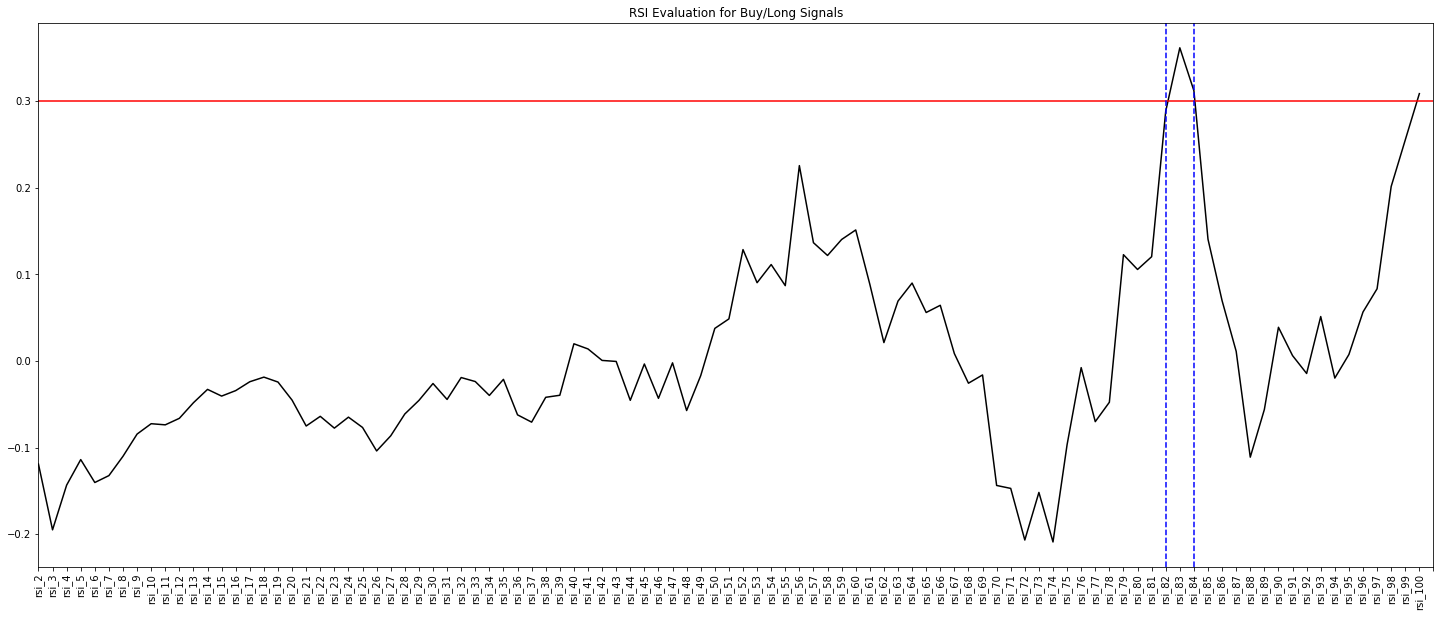

In [14]:
plt.figure(figsize=(25,10))
large_buy_df.mean().plot(color = "black")
plt.xticks(np.arange(0,100,1), large_buy_df.columns[0:100:1], rotation = 90)
plt.title("RSI Evaluation for Buy/Long Signals")

plt.axhline(y = 0.3, color = "r")
plt.axvline(x = 80, color = "blue", linestyle = "--")
plt.axvline(x = 82, color = "blue", linestyle = "--")

In [5]:
print("Lower bound for param space for Buy signals is '{}'".format(large_buy_df.columns[80]))
print("Upper bound for param space for Buy signals is '{}'".format(large_buy_df.columns[82]))

Lower bound for param space for Buy signals is 'rsi_82'
Upper bound for param space for Buy signals is 'rsi_84'


We observe that the best intraday window parameter for RSI for Buy signals is:

- greater than 82 intraday intervals
- lower than 84 intraday intervals

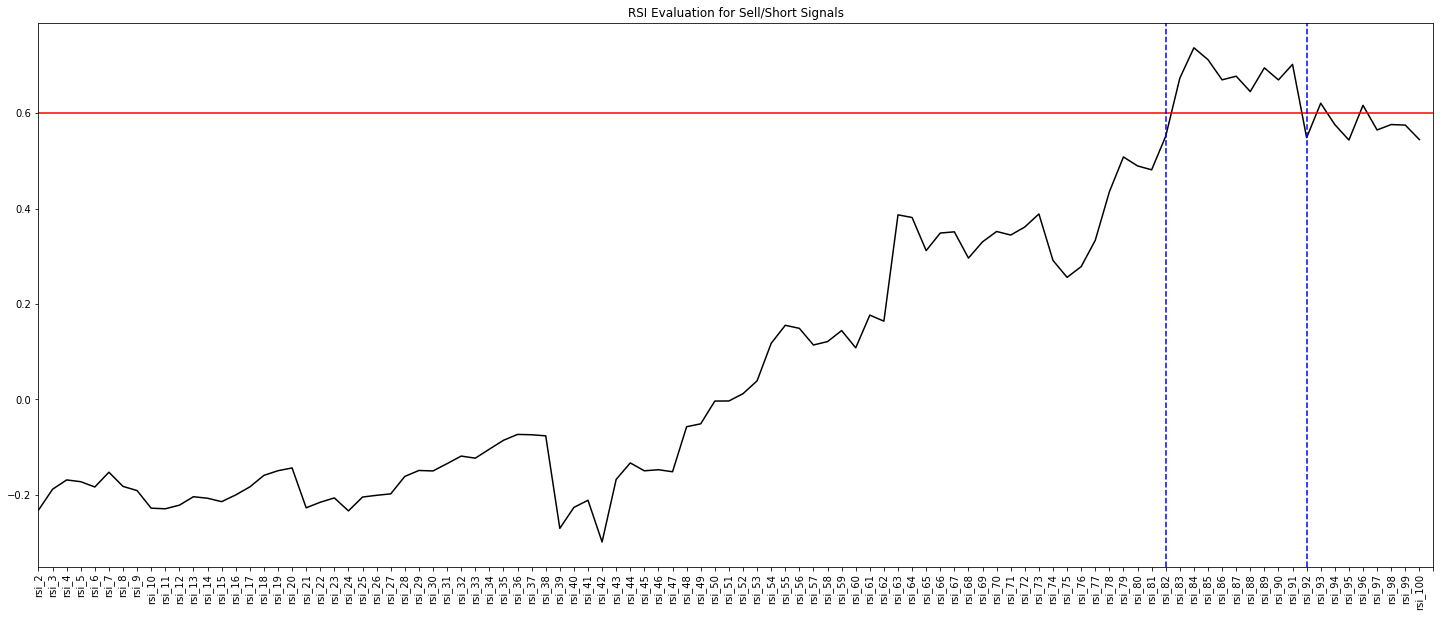

In [6]:
plt.figure(figsize=(25,10))
large_sell_df.mean().plot(color = "black")
plt.xticks(np.arange(0,100,1), large_sell_df.columns[0:100:1], rotation = 90)
plt.title("RSI Evaluation for Sell/Short Signals")

plt.axhline(y = 0.6, color = "r")
plt.axvline(x = 80, color = "blue", linestyle = "--")
plt.axvline(x = 90, color = "blue", linestyle = "--")

In [7]:
print("Lower bound for reduced param space for Sell signals is '{}'".format(large_buy_df.columns[80]))
print("Upper bound for reduced param space for Sell signals is '{}'".format(large_buy_df.columns[90]))

Lower bound for reduced param space for Sell signals is 'rsi_82'
Upper bound for reduced param space for Sell signals is 'rsi_92'


We observe the best intraday window parameter range for RSI Sell signals is:
- greater than 82 intraday intervals
- lower than 92 intraday intervals

# Reduced Strategy Parameter Space Evaluation

Using the reduced parameter search space, we will calculate the yearly breakdown of the annualised metric return for Buy and Sell signals separately.

In [8]:
# Buy RSI Window intervals
buy_rsi_window_list = [i for i in range(82,85)]

# Sell RSI Window intervals
sell_rsi_window_list = [i for i in range(82,92)]

In [11]:
# 'Buy'
buy_df = strategy_eval_rsi("buy_only", data_directory_path, buy_rsi_window_list)


100%|██████████| 3/3 [01:09<00:00, 23.38s/it]


In [13]:
# 'Sell'
sell_df = strategy_eval_rsi("sell_only", data_directory_path, sell_rsi_window_list)


100%|██████████| 10/10 [04:03<00:00, 24.41s/it]


In [12]:
buy_df

,rsi(82/13),rsi(83/13),rsi(84/13)
year,,,
2000,2.712420,3.005298,3.262600
2001,0.377270,0.716626,0.056650
2002,0.267363,0.148715,0.549903
2003,0.513987,0.740439,0.822025
2004,0.643607,0.630377,0.636004
2005,0.512253,0.552292,0.255928
2006,0.865065,1.048695,1.029864
2007,0.439940,0.294346,0.253712
2008,3.700621,3.905281,4.003604


In [15]:
sell_df

,rsi(82/13),rsi(83/13),rsi(84/13),rsi(85/13),rsi(86/13),rsi(87/13),rsi(88/13),rsi(89/13),rsi(90/13),rsi(91/13)
year,,,,,,,,,,
2000,2.357979,2.379933,2.280243,2.286049,2.215960,2.221108,2.230051,2.361405,2.477689,2.563989
2001,3.988211,5.381853,5.494154,5.539482,2.841133,2.964310,3.020091,3.131625,2.883045,2.899800
2002,2.922165,2.887855,2.856320,2.684018,3.515324,3.225666,3.210459,3.211929,3.305941,3.535506
2003,-0.157508,-0.102578,-0.156393,-0.146235,-0.233351,-0.198627,-0.269643,-0.252388,-0.306875,-0.234086
2004,-0.440352,-0.405689,-0.517816,-0.473302,-0.464939,-0.320226,-0.330722,-0.375790,-0.413919,-0.412628
2005,0.617434,0.670199,0.751345,0.768015,0.799220,0.804906,0.865816,0.914719,0.776335,0.776218
2006,0.146045,0.184861,0.195919,0.248636,0.298814,0.342145,0.392488,0.367662,0.377417,0.392900
2007,0.812477,0.836202,0.880302,1.062392,1.113940,1.133170,1.053776,0.851829,0.814031,0.731561
2008,2.128052,2.128052,2.091160,1.833118,2.097593,2.255616,1.662514,1.767769,1.606841,1.713241


Based on the calculation across the different RSI strategies, we can find the best strategy as defined by the average annualised metric performance across 21 years. Thereafter we can obtain relevant statistics about the strategy's performance such as:

- Average annualised return metric
- Standard deviation of the annualised return metric across 21 years
- Average annualised return per unit of standard deviation risk (reward-to-risk)
- Filter trade signal counts
- Average portfolio cumulative return (based on equal stock weightage)
- Average holding time in days per trade signal


In [16]:
top_buy_stats = get_stats_rsi(buy_df, "buy_only", data_directory_path)
# Capitalising format for index
top_buy_stats.index = [str(top_buy_stats.index[0]).upper()]

In [18]:
top_sell_stats = get_stats_rsi(sell_df, "sell_only", data_directory_path)
# Capitalising format for index
top_sell_stats.index = [str(top_sell_stats.index[0]).upper()]

In [17]:
top_buy_stats

,avg_metric,std_metric,avg_metric/std_metric,filter_counts,avg_port_cum_return,avg_holding_time_per_signal
RSI(83/13),0.361724,2.151697,0.168111,6225.0,0.936838,0.890408


In [19]:
top_sell_stats

,avg_metric,std_metric,avg_metric/std_metric,filter_counts,avg_port_cum_return,avg_holding_time_per_signal
RSI(84/13),0.737547,1.521119,0.484871,7831.0,1.05315,0.978321


In [37]:
# Output to csvs
top_buy_stats.to_csv("../Output_strategy_statistics/rsi_top_buy.csv")

top_sell_stats.to_csv("../Output_strategy_statistics/rsi_top_sell.csv")